In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
#Формируем данные
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [3]:
#Делим данные 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
#Градиентный бустинг

def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors


In [5]:
import matplotlib.pyplot as plt
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
Сделать выводы о зависимости ошибки от этих параметров.

In [6]:
# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [7]:
train_prediction = gb_predict(X_train, trees, coefs, eta)

print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

test_prediction = gb_predict(X_test, trees, coefs, eta)

print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 5.90772116256204
Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 1 на тестовой выборке: 6310.92875319967


In [8]:
n_trees_mas = [1, 5, 10, 50, 100]

# Число деревьев в ансамбле
#n_trees = 20

# для простоты примем коэффициенты равными 1
#coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.1

error_train_mas = []
error_test_mas = []
for n_trees in n_trees_mas:
    print(f'Начало обучения {n_trees} деревьев глубиной {max_depth}')
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    error_train_mas.append(mean_squared_error(y_train, train_prediction))
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    error_test_mas.append(mean_squared_error(y_test, test_prediction))
    print(f'Конец обучения {n_trees} деревьев глубиной {max_depth}')

Начало обучения 1 деревьев глубиной 10
Конец обучения 1 деревьев глубиной 10
Начало обучения 5 деревьев глубиной 10
Конец обучения 5 деревьев глубиной 10
Начало обучения 10 деревьев глубиной 10
Конец обучения 10 деревьев глубиной 10
Начало обучения 50 деревьев глубиной 10
Конец обучения 50 деревьев глубиной 10
Начало обучения 100 деревьев глубиной 10
Конец обучения 100 деревьев глубиной 10


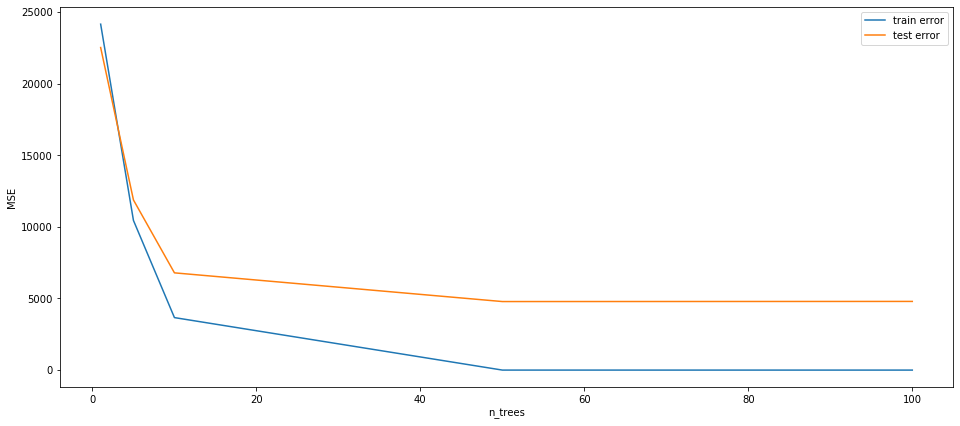

Ошибки на обучающей: [24145.6908348679, 10446.410413450496, 3664.1482509928032, 0.8723134776320577, 3.278724041506504e-05]
Ошибки на обучающей: [22515.349452987055, 11875.591082992361, 6787.7898146522775, 4784.268927291629, 4793.884494877736]


In [9]:
plt.figure(figsize = (16, 7))

# график обучающей выборки
#plt.subplot(1,2,1)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_train_mas, label='train error')

# график тестовой выборки
#plt.subplot(1,2,2)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_test_mas, label='test error')
plt.legend(loc='upper right')

plt.show()

print(f'Ошибки на обучающей: {error_train_mas}')
print(f'Ошибки на обучающей: {error_test_mas}')

In [10]:
max_depth_mas = [1, 5, 10, 50, 100]

# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
# max_depth = 10

# Шаг
eta = 0.1

error_train_mas = []
error_test_mas = []
for max_depth in max_depth_mas:
    print(f'Начало обучения {n_trees} деревьев глубиной {max_depth}')
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    error_train_mas.append(mean_squared_error(y_train, train_prediction))
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    error_test_mas.append(mean_squared_error(y_test, test_prediction))
    print(f'Конец обучения {n_trees} деревьев глубиной {max_depth}')

Начало обучения 20 деревьев глубиной 1
Конец обучения 20 деревьев глубиной 1
Начало обучения 20 деревьев глубиной 5
Конец обучения 20 деревьев глубиной 5
Начало обучения 20 деревьев глубиной 10
Конец обучения 20 деревьев глубиной 10
Начало обучения 20 деревьев глубиной 50
Конец обучения 20 деревьев глубиной 50
Начало обучения 20 деревьев глубиной 100
Конец обучения 20 деревьев глубиной 100


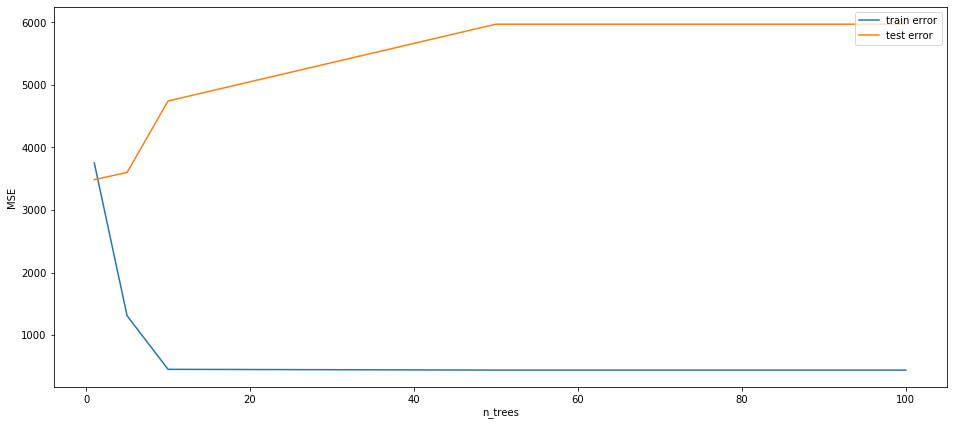

Ошибки на обучающей: [3753.4707567684704, 1309.2368304302759, 452.3399725525517, 440.0242058523794, 440.0242058523794]
Ошибки на обучающей: [3486.089688943339, 3601.0586799089856, 4743.633389230289, 5972.314788804747, 5972.314788804747]


In [11]:
plt.figure(figsize = (16, 7))

# график обучающей выборки
#plt.subplot(1,2,1)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_train_mas, label='train error')

# график тестовой выборки
#plt.subplot(1,2,2)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_test_mas, label='test error')
plt.legend(loc='upper right')

plt.show()

print(f'Ошибки на обучающей: {error_train_mas}')
print(f'Ошибки на обучающей: {error_test_mas}')

С увеличением числа деревьев ансамбле точность растет. При увеличении глубины деревьев модель переобучается.

2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. 
    Сравнить на одном графике кривые  изменения ошибки на тестовой выборке в зависимости от  числа итераций.

In [12]:
def gb_bust_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = \
        model_selection.train_test_split(X_train, y_train, test_size=0.50)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_subset, y_train_subset)
            
            train_errors.append(mean_squared_error(y_train_subset, gb_predict(X_train_subset, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_subset, gb_predict(X_test_subset, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_subset, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_subset, bias(y_train_subset, target))
            
            train_errors.append(mean_squared_error(y_train_subset, gb_predict(X_train_subset, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_subset, gb_predict(X_test_subset, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors


Начало обучения 1 деревьев глубиной 10
Конец обучения 1 деревьев глубиной 10
Начало обучения 5 деревьев глубиной 10
Конец обучения 5 деревьев глубиной 10
Начало обучения 10 деревьев глубиной 10
Конец обучения 10 деревьев глубиной 10
Начало обучения 30 деревьев глубиной 10
Конец обучения 30 деревьев глубиной 10
Начало обучения 50 деревьев глубиной 10
Конец обучения 50 деревьев глубиной 10


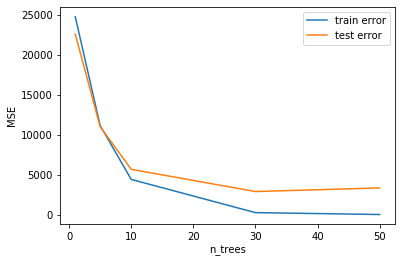

Ошибки на обучающей: [24708.871611144674, 11167.189005633933, 4448.351555706255, 310.0366595908327, 75.32178073474567]
Ошибки на обучающей: [22542.275148448454, 11022.50712761239, 5706.71219089426, 2937.077592896442, 3389.8566660347938]


In [13]:
n_trees_mas = [1, 5, 10, 30, 50]

# Число деревьев в ансамбле
#n_trees = 20

# для простоты примем коэффициенты равными 1
#coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.1

error_train_mas = []
error_test_mas = []
for n_trees in n_trees_mas:
    print(f'Начало обучения {n_trees} деревьев глубиной {max_depth}')
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_bust_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    error_train_mas.append(mean_squared_error(y_train, train_prediction))
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    error_test_mas.append(mean_squared_error(y_test, test_prediction))
    print(f'Конец обучения {n_trees} деревьев глубиной {max_depth}')
    
    
# график обучающей выборки
#plt.subplot(1,2,1)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_train_mas, label='train error')

# график тестовой выборки
#plt.subplot(1,2,2)
plt.xlabel('n_trees')
plt.ylabel('MSE')
#plt.xlim(0, n_trees)
plt.plot(n_trees_mas, error_test_mas, label='test error')
plt.legend(loc='upper right')

plt.show()

print(f'Ошибки на обучающей: {error_train_mas}')
print(f'Ошибки на обучающей: {error_test_mas}')